Nancy Engel

Greater Justice NY Exercise, Research Associate Position

1/8/21

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
#load csvs into data frames
albany = pd.read_csv('albany_admissions.csv')
nyc = pd.read_csv('nyc_admissions.csv')
data = pd.concat([albany,nyc])

In [3]:
#convert string formatted date columns to datetime objects
data.admission_date=pd.to_datetime(data.admission_date)
data.release_date=pd.to_datetime(data.release_date)

In [4]:
#filter only for pretrial cases
data = data[data.admission_status == 'Pretrial']

In [5]:
#recode hispanic ethnicity as new race variable
#so that when I'm looking at black v white later 
#I'm not including Hispanic people in both of those categories
data['race'] = np.where(data['ethnicity'] == "Hispanic", "Hispanic", data['race'])

In [6]:
#adding boolean column
#true if admission was on or after Jan 1 2020
#assuming that admission date before Jan 1 2020, 
#even if not released, determines impact on bail

after = data[data.admission_date >= '2020-01-01']
before = data[data.admission_date < '2020-01-01']

In [12]:
#adding column showing number of days held 
after.loc[:, 'time_held'] = after.release_date - after.admission_date
before.loc[:, 'time_held'] = before.release_date - before.admission_date

In [8]:
#adding boolean column
#true if not released same day as admission
after.loc[:, 'held'] = after.time_held > dt.timedelta(days=0)
before.loc[:, 'held'] = before.time_held > dt.timedelta(days=0)

## Exercises 1 and 2: 

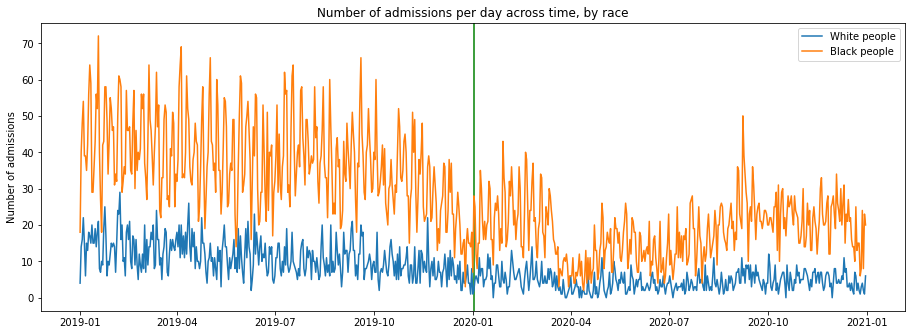

In [9]:
#Figure 1
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
data = data.sort_values('admission_date', ascending=True)
x = data.admission_date.unique()

num_admissions_white=(data[data.race=="White"]
.groupby(pd.Grouper(key='admission_date', freq='D')).count())
num_admissions_black=(data[data.race=="Black"]
.groupby(pd.Grouper(key='admission_date', freq='D')).count())

ax.set_ylabel('Number of admissions')
ax.set_title('Number of admissions per day across time, by race')
plt.axvline(x=18263, color='green')
plt.plot(x, num_admissions_white.race, label="White people")
plt.plot(x, num_admissions_black.race, label="Black people")
plt.legend(loc="upper right")
plt.show()

Figure 1 shows the number of admissions across time, for Black and White (non-Hispanic) people, before and after the bail laws took effect. We can see that before 1/1/20 there is clearly a greater disparity between the number of admissions per day for Black and White people as compared to after the laws went into play, although a disparity remains a year later in January 2021. Interestingly, it looks like the size of the gap was declining even before Jan 2020. It's also notable that in early January 2021 there is a small spike before the admission rates continue to decline for both groups. 

The number of daily admissions did decline for White people as well, but only slightly; for Black people the decline is more significant, and thus we can see that the laws seem to have lessened the disparity between Black and White people being held pretrial. 

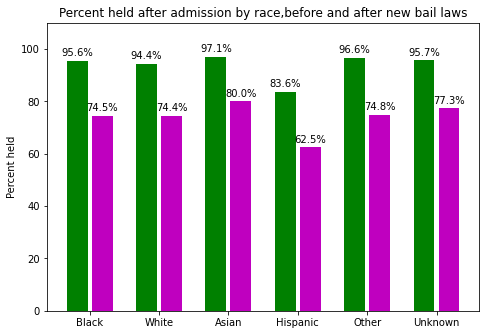

In [10]:
#Figure 2
fig1 = plt.figure()
ax = fig1.add_axes([0,0,1,1])

labels = ["Black", "White", "Asian", "Hispanic", "Other", "Unknown"]
x = np.arange(len(labels))
y = [[(before[before.race=="Black"]
       .held.value_counts(normalize=True)*100)[1], 
        (before[before.race=="White"]
         .held.value_counts(normalize=True)*100)[1], 
        (before[before.race=="Asian"]
         .held.value_counts(normalize=True)*100)[1], 
        (before[before.race=="Hispanic"]
         .held.value_counts(normalize=True)*100)[1], 
        (before[before.race=="Other"]
         .held.value_counts(normalize=True)*100)[1], 
        (before[before.race=="Unknown"]
         .held.value_counts(normalize=True)*100)[1]],
     [(after[after.race=="Black"]
       .held.value_counts(normalize=True)*100)[1],
        (after[after.race=="White"]
         .held.value_counts(normalize=True)*100)[1],
        (after[after.race=="Asian"]
         .held.value_counts(normalize=True)*100)[1],
        (after[after.race=="Hispanic"]
         .held.value_counts(normalize=True)*100)[1],
        (after[after.race=="Other"]
         .held.value_counts(normalize=True)*100)[1],
        (after[after.race=="Unknown"]
         .held.value_counts(normalize=True)*100)[1]]]

rects1 = ax.bar(x - 0.18, y[0], 
    color = 'g', width = 0.3)
rects2 = ax.bar(x + 0.18, y[1], 
    color = 'm', width = 0.3)

ax.set_ylabel('Percent held')
ax.set_title('Percent held after admission by race,before and after new bail laws')
ax.set_xticks(x, labels)

ax.bar_label(rects1, padding=3, fmt='%.1f%%')
ax.bar_label(rects2, padding=3, fmt='%.1f%%')

plt.ylim((0,110))
plt.show()

Figure 2 compares the percentage of people held pretrial by race (except Hispanic being an ethnic group), before and after the bail laws took effect. We can see that for all racial groups, the percentage of people held decreased notably, by over 17 percent. This does not comment on a difference in racial or ethnic disparity, but does show that the new bail laws did significantly decrease percentage of people held for all racial and ethnic groups. I was surprised to see that there was such a significant difference in all groups!

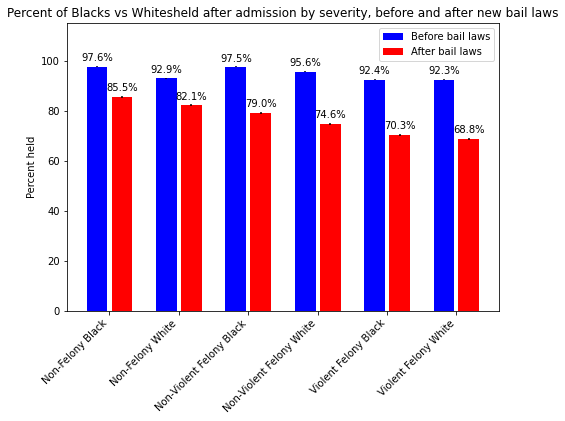

In [11]:
#Figure 3
fig2 = plt.figure()
ax = fig2.add_axes([0,0,1,1])

#before
bl_nonf_bf=before[(before.severity=="Non-Felony") 
    & (before.race=="Black")].held
wh_nonf_bf=before[(before.severity=="Non-Felony") 
    & (before.race=="White")].held
bl_nvf_bf=before[(before.severity=="Non-Violent Felony") 
    & (before.race=="Black")].held
wh_nvf_bf=before[(before.severity=="Non-Violent Felony") 
    & (before.race=="White")].held
bl_vf_bf=before[(before.severity=="Violent Felony") 
    & (before.race=="Black")].held
wh_vf_bf=before[(before.severity=="Violent Felony") 
    & (before.race=="White")].held

#after
bl_nonf_af=after[(after.severity=="Non-Felony") 
    & (after.race=="Black")].held
wh_nonf_af=after[(after.severity=="Non-Felony") 
    & (after.race=="White")].held
bl_nvf_af=after[(after.severity=="Non-Violent Felony") 
    & (after.race=="Black")].held
wh_nvf_af=after[(after.severity=="Non-Violent Felony") 
    & (after.race=="White")].held
bl_vf_af=after[(after.severity=="Violent Felony") 
    & (after.race=="Black")].held
wh_vf_af=after[(after.severity=="Violent Felony") 
    & (after.race=="White")].held

#stds, these are so small they're barely visible on graph
yerr_bf=[np.std(bl_nonf_bf), 
         np.std(wh_nonf_bf), 
         np.std(bl_nvf_bf), 
         np.std(wh_nvf_bf), 
         np.std(bl_vf_bf), 
         np.std(wh_vf_bf)]
yerr_af=[np.std(bl_nonf_af), 
         np.std(wh_nonf_af), 
         np.std(bl_nvf_af), 
         np.std(wh_nvf_af), 
         np.std(bl_vf_af), 
         np.std(wh_vf_af)]

labels = ["Non-Felony Black", "Non-Felony White",\
          "Non-Violent Felony Black",\
          "Non-Violent Felony White",\
          "Violent Felony Black", "Violent Felony White"]
x = np.arange(len(labels))
y = [[(bl_nonf_bf.value_counts(normalize=True)*100)[1],
        (wh_nonf_bf.value_counts(normalize=True)*100)[1],
        (bl_nvf_bf.value_counts(normalize=True)*100)[1], 
        (wh_nvf_bf.value_counts(normalize=True)*100)[1], 
        (bl_vf_bf.value_counts(normalize=True)*100)[1],
        (wh_vf_bf.value_counts(normalize=True)*100)[1]],
        [(bl_nonf_af.value_counts(normalize=True)*100)[1],
        (wh_nonf_af.value_counts(normalize=True)*100)[1],
        (bl_nvf_af.value_counts(normalize=True)*100)[1],
        (wh_nvf_af.value_counts(normalize=True)*100)[1],
        (bl_vf_af.value_counts(normalize=True)*100)[1],
        (wh_vf_af.value_counts(normalize=True)*100)[1]]]

rects1 = ax.bar(x - 0.18, y[0], color = 'b',
    width = 0.3, yerr=yerr_bf, label="Before bail laws")
rects2 = ax.bar(x + 0.18, y[1], color = 'r',
    width = 0.3, yerr=yerr_af, label="After bail laws")
ax.set_ylabel('Percent held')
ax.set_title('Percent of Blacks vs Whites' +\
  'held after admission by severity, before and after new bail laws')
ax.set_xticks(x, labels)

ax.bar_label(rects1, padding=3, fmt='%.1f%%')
ax.bar_label(rects2, padding=3, fmt='%.1f%%')

plt.legend(loc="upper right")
plt.xticks(rotation = 45, ha="right")
plt.ylim((0,115))
plt.show()

Lastly, Figure 3 builds on Figure 2, while also taking the severity of the charge into account, as severity is key in the bail laws. Surprisingly, the difference before and after the laws taking effect increases with the severity of the charge. 

Although the laws do require judges to "consider the least restrictive conditions that will reasonably ensure a person appears for their court dates", the judges do still have more leeway to make their own decisions with more severe charges. For misdemeanors, they are no longer permitted to hold people with monetary conditions, so I expected misdemeanors to have the biggest decrease in percentage of people held. 

I wondered if this was due to sample size, so I took standard deviations, but these were so small they are not visible on the graph; we can conclude sample size is not the explanation.

The results of this figure are making me wonder whether I should have considered length of time held rather than whether someone was held at all, as it seems strange that so many people could be held with non-felony charges after the laws were set into motion. 

## Exercise 3:

To manage the cleaning and standardization process, I would create clear documentation about how the cleaned, standardized final dataset should look. The overall dataset would have to include a column denoting which county jail each row came from, so we could analyze data based on location if desired, and because most likely each county jail's data would have variations in formatting and content. 

To create the documentation, I would dig into a handful of the datasets (at least 5) in order to see what differences they have and determine which data is crucial to grab from all of them, and which data could be nice to have when available. I would then determine what format the data should be in, by looking at what formats there already are and considering how the data would be analyzed later on. Before giving the data to others to work with, I would test the protocol with other datasets myself and adjust the documentation based on any issues that arise. 

When handing the data to others to work with, I'd make sure they would have space to ask questions after I explain the initial task, then have them verify we are all on the same page by asking them to clean and standardize a chunk of data I had already done to make sure all of our work matches up. I think that having clear documentation and having worked closely with the data myself are key. I would make myself available for questions throughout the whole process, have periodic meetings to check in, and regularly ask for feedback. 